# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.038952e+01     7.315661e+00
 * time: 0.00427699089050293
     1     2.653530e+01     4.615280e+00
 * time: 0.01219487190246582
     2     2.008903e+01     5.252282e+00
 * time: 0.030592918395996094
     3     1.265765e+01     1.350436e+00
 * time: 0.053819894790649414
     4     1.154193e+01     1.929384e+00
 * time: 0.06934094429016113
     5     1.110942e+01     1.142310e+00
 * time: 0.08482980728149414
     6     1.018723e+01     1.250338e+00
 * time: 0.1004328727722168
     7     9.662353e+00     8.167813e-01
 * time: 0.1158750057220459
     8     9.350461e+00     4.856624e-01
 * time: 0.13168096542358398
     9     9.334167e+00     1.067164e+00
 * time: 0.14345383644104004
    10     9.316000e+00     1.374815e+00
 * time: 0.1551809310913086
    11     9.303989e+00     9.227964e-01
 * time: 0.16688799858093262
    12     9.166692e+00     7.480485e-01
 * time: 0.17873096466064453
    13     9.106151e+00     1.035447e+00
 * time: 

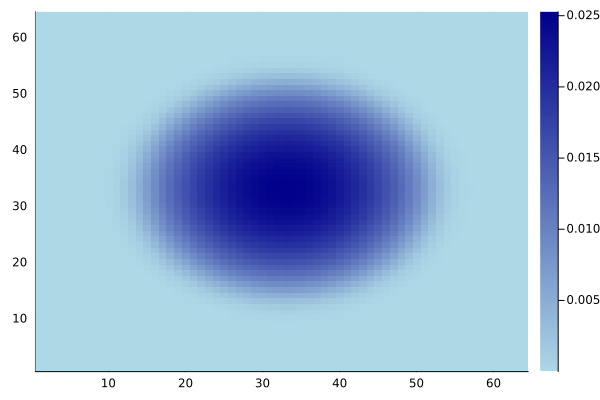

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)